In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
raw_data = pd.read_csv("artists.csv", delimiter='\t')
raw_data.head()

,id,name,genres,followers,popularity
0,7EnWkKTmRG5i9rW93o5DZm,Axxad,viral rap,6826,48
1,1SQRv42e4PjEYfPhS0Tk9E,The Kinks,"album rock, art rock, british invasion, classi...",2272554,65
2,5I7ErPVeubiYhds5DFcbfM,axxturel,NaN,17119,46
3,0cEVpgfIpUSsUKUMsRrhtZ,Mitch Rossell,"contemporary country, country, country pop, co...",27714,51
4,4yiQZ8tQPux8cPriYMWUFP,Gwen Stefani,"dance pop, pop, post-teen pop",5681900,75


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4378 entries, 0 to 4377
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4378 non-null   object
 1   name        4378 non-null   object
 2   genres      3767 non-null   object
 3   followers   4378 non-null   int64 
 4   popularity  4378 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 171.1+ KB


### I. Describe columns meaning:

In [5]:
artists_data_des = pd.read_csv('artists_data_des.csv', delimiter='\t')
artists_data_des

,column name,data type,meaning,example
0,id,string,Id of artist,7EnWkKTmRG5i9rW93o5DZm
1,name,string,Name of artist,Axxad
2,genres,string,Artist genres,viral rap
3,followers,int,Number of followers,6826
4,popularity,int,Artist popularity,48


### II. Check duplicated artists and get the number of unique artists

Number of dupicated artists:

In [6]:
raw_data['id'].duplicated().sum()

2460

In [14]:
raw_data[raw_data['id'].duplicated()]

,id,name,genres,followers,popularity
19,4O15NlyKLIASxsJ0PrXPfz,Lil Uzi Vert,"melodic rap, philly rap, rap, trap",14157761,86
74,4Gso3d4CscCijv0lmajZWs,Don Toliver,"pop, rap, trap",2413501,82
76,757aE44tKEUQEqRuT6GnEB,Roddy Ricch,"melodic rap, rap, trap",8673726,81
78,08F3Y3SctIlsOEmKd6dnH8,Yusuf / Cat Stevens,"british folk, classic rock, folk, folk rock, m...",1623579,69
97,4STHEaNw4mPZ2tzheohgXB,Paul McCartney,"album rock, art rock, beatlesque, classic rock...",4206798,74
...,...,...,...,...,...
4371,1MIVXf74SZHmTIp4V4paH4,Mabel,"dance pop, edm, pop, pop dance, post-teen pop,...",1717262,70
4372,4oLeXFyACqeem2VImYeBFe,Fred again..,"edm, house",443653,76
4375,2VSHKHBTiXWplO8lxcnUC9,GAYLE,modern alternative pop,545792,70
4376,4XC335ouK6pXyq4QiIb8bP,Eliza Rose,house,25021,70


Number of unique artists:

In [16]:
raw_data['id'].nunique()

1918

### III. Handling data

#### 1. Drop rows with null values in "genres" column

In [37]:
raw_data['genres'].isnull().sum()

611

In [54]:
handled_data = raw_data.dropna(how='any',axis=0) 
handled_data = handled_data.reset_index(drop=True)
handled_data

,id,name,genres,followers,popularity
0,7EnWkKTmRG5i9rW93o5DZm,Axxad,viral rap,6826,48
1,1SQRv42e4PjEYfPhS0Tk9E,The Kinks,"album rock, art rock, british invasion, classi...",2272554,65
2,0cEVpgfIpUSsUKUMsRrhtZ,Mitch Rossell,"contemporary country, country, country pop, co...",27714,51
3,4yiQZ8tQPux8cPriYMWUFP,Gwen Stefani,"dance pop, pop, post-teen pop",5681900,75
4,1UTPBmNbXNTittyMJrNkvw,Blake Shelton,"contemporary country, country, country road, o...",6777521,74
...,...,...,...,...,...
3762,4oLeXFyACqeem2VImYeBFe,Fred again..,"edm, house",443653,76
3763,2WX2uTcsvV5OnS0inACecP,Birdy,pop,3616492,71
3764,2VSHKHBTiXWplO8lxcnUC9,GAYLE,modern alternative pop,545792,70
3765,4XC335ouK6pXyq4QiIb8bP,Eliza Rose,house,25021,70


#### 2. Drop duplicated

In [77]:
unique_data = raw_data.drop_duplicates(subset=['id'], keep='first')
unique_data = unique_data.reset_index(drop=True)
unique_data

,id,name,genres,followers,popularity
0,7EnWkKTmRG5i9rW93o5DZm,Axxad,viral rap,6826,48
1,1SQRv42e4PjEYfPhS0Tk9E,The Kinks,"album rock, art rock, british invasion, classi...",2272554,65
2,5I7ErPVeubiYhds5DFcbfM,axxturel,NaN,17119,46
3,0cEVpgfIpUSsUKUMsRrhtZ,Mitch Rossell,"contemporary country, country, country pop, co...",27714,51
4,4yiQZ8tQPux8cPriYMWUFP,Gwen Stefani,"dance pop, pop, post-teen pop",5681900,75
...,...,...,...,...,...
1913,1HwM5zlC5qNWhJtM00yXzG,DMX,"east coast hip hop, gangster rap, hardcore hip...",3892020,70
1914,1QL7yTHrdahRMpvNtn6rI2,George Frideric Handel,"baroque, classical, early music, english baroq...",782701,68
1915,44QKSpMVTzPZGcOegCwtIf,Mario Sollazzo,italian classical piano,1108,38
1916,4QTm9TRLBaMhCqQE96ETN6,Nathan Archie,NaN,4872,44


### IV. Tracks participation of artists

Counting artists occurences:

In [9]:
occurence_count = raw_data.groupby(raw_data.columns.to_list(), as_index=False).size()
occurence_count

,id,name,genres,followers,popularity,size
0,003f4bk13c6Q3gAUXv7dGJ,Wiener Philharmoniker,"austrian orchestra, classical performance, orc...",111232,67,1
1,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,"art pop, pop",19300869,89,1
2,00XhexlJEXQstHimpZN910,Brytiago,"latin hip hop, reggaeton, reggaeton flow, trap...",5707154,74,1
3,00gh6kmKYOu8xyorRxQm6a,Steve Roach,"ambient, drift, drone, fourth world, moog",32337,37,1
4,02QYcz7JjwzKiKGHg53rZY,Sasha,dancehall queen,7191,54,1
...,...,...,...,...,...,...
1394,7xxrAPVVTZaXLTXfvwABVF,Lo Fi Hip Hop,lo-fi product,26461,48,3
1395,7yK3vix9XmeNwPDmjGs78F,Manal,"arabic hip hop, moroccan pop, rap maroc",431835,53,1
1396,7yL97o50EXql8p3iFo6MHe,Jake Eaw,anime piano,1692,42,5
1397,7z2avKuuiMAT4XZJFv8Rvh,Tom Walker,"indie anthem-folk, pop, uk pop",1004760,68,1


The most frequent artist:

In [10]:
occurence_count.loc[occurence_count['size'].idxmax()]

id                1dABGukgZ8XKKOdd2rVSHM
name                   Lofi Fruits Music
genres        lo-fi cover, lo-fi product
followers                         792245
popularity                            78
size                                 154
Name: 295, dtype: object

### V. Dataset description

In [11]:
data_description = raw_data.describe().astype('int')
data_description

,followers,popularity
count,4378,4378
mean,4923317,62
std,11977425,20
min,0,0
25%,50084,50
50%,758915,69
75%,4250297,77
max,106095624,100


<BarContainer object of 8 artists>

<Figure size 2000x2000 with 0 Axes>

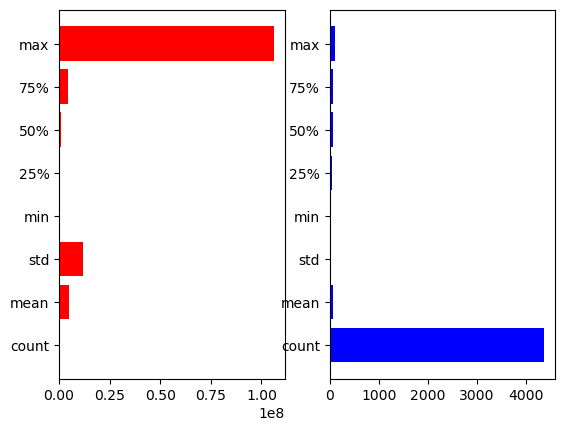

In [12]:
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots(1, 2)
ax[0].barh(data_description.index, data_description['followers'], color = 'red')
ax[1].barh(data_description.index, data_description['popularity'], color = 'blue')

### VI. Compute artists correlation

In [13]:
raw_data.corr(method="spearman")

,followers,popularity
followers,1.000000,0.854698
popularity,0.854698,1.000000


### VII. Answering meaningful questions

#### 1. From 2020 to 2022, which are the hottest genres ?

<AxesSubplot:>

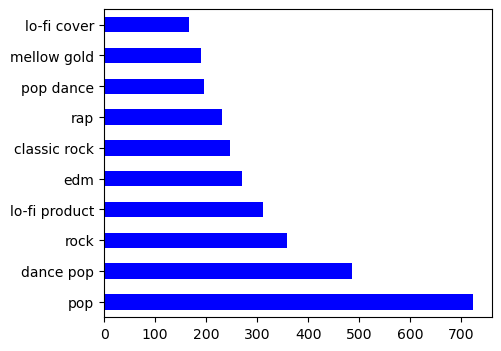

In [66]:
handled_data['genres'].str.split(', ').explode().value_counts().nlargest(10).plot.barh(figsize=(5,4), color='blue')

#### 2. From 2020 to 2022, which are the most frequent artists ?

<AxesSubplot:>

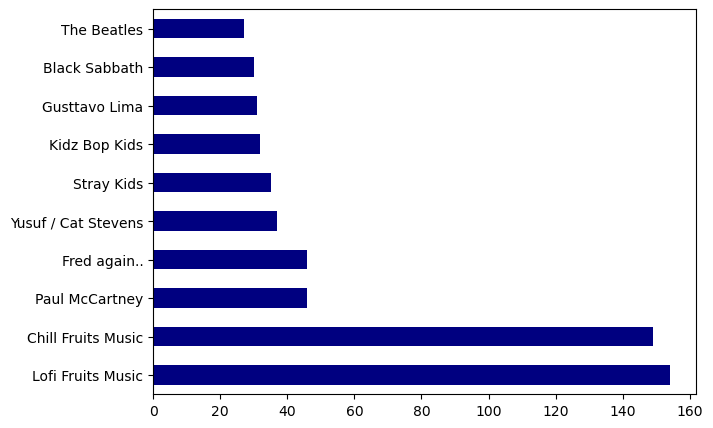

In [72]:
raw_data['name'].value_counts().nlargest(10).plot.barh(figsize=(7,5), color='navy')

#### 3. What is popularity distribution ?

In [96]:
unique_data['popularity'].value_counts().describe().astype(np.int64)

count    98
mean     19
std      11
min       1
25%      10
50%      19
75%      28
max      39
Name: popularity, dtype: int64

<AxesSubplot:>

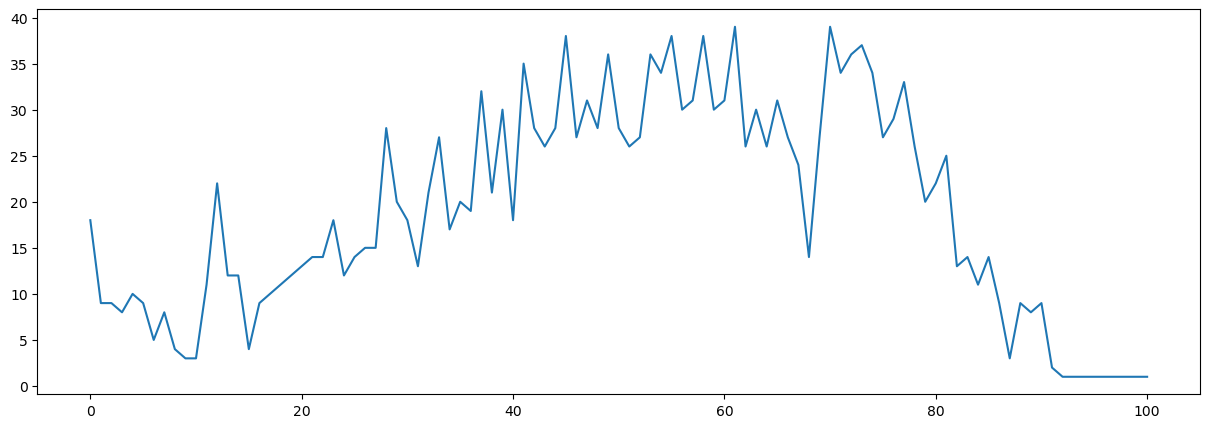

In [102]:
unique_data['popularity'].value_counts().sort_index().plot.line(figsize=(15,5))